# TESTANDO MODELOS NAS VARIÁVEIS TODOS OS TEMAS

####  esse script roda a base da Mariana com e sem ponderação por balanceamento.
#### trantando variáveis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
# FUNÇÃO PARA VERIFICAR A QUANTIDADE DE DADOS FALTANTES

def missing_data_info(data):
    missing_count = data.isnull().sum()

    missing_percent = 100 * data.isnull().mean()
    data_types = data.dtypes
    missing_info = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percent': missing_percent,
        'Data Type': data_types
    })

    return missing_info.sort_values(by='Missing Percent', ascending=False)

# missing_data_info(df)

In [3]:
# Load the datasets

pd.set_option('display.max_columns', 170)
pd.set_option('display.max_rows', 170)

df = pd.read_csv('bases/df_modelo.csv')

df

,uf_ibge,classf,id_familia,cod_local_domic_fam,qtd_comodos_domic_fam,cod_material_piso_fam,cod_iluminacao_domic_fam,ind_parc_mds_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ind_parc_mds_fam_0_1,ideb_2017_municipio
0,42,2,268503,1.0,5.0,5.0,1.0,0.0,4,5128.0,102,0.0,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,0.0,6.3
1,29,3,2888440,2.0,2.0,2.0,1.0,0.0,2,2646.0,151,0.0,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,5.1
2,35,3,2113517,1.0,5.0,5.0,1.0,0.0,2,5979.0,482,2.0,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,5.7
3,33,2,4419096,1.0,3.0,5.0,1.0,0.0,2,238.0,238,0.0,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,4.7
4,28,1,4241219,1.0,4.0,5.0,1.0,0.0,1,5500.0,17,0.0,56,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96497,35,1,5181019,1.0,2.0,5.0,2.0,0.0,3,1643.0,438,0.0,25,1.0,2,2.0,2,8.0,-1.0,1.0,1.0,1.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,6.3
96498,23,2,3853705,1.0,2.0,5.0,6.0,0.0,2,479.0,479,0.0,18,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,5.8
96499,29,3,1232994,1.0,6.0,5.0,1.0,0.0,2,843.0,836,2.0,68,-1.0,2,-1.0,1,-1.0,-1.0,2.0,4.0,-1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.0,0.5,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,4.5
96500,31,3,1330889,1.0,5.0,5.0,1.0,0.0,3,2679.0,628,0.0,37,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0.0,6.2


In [4]:
# Deletar a coluna id_familia do DataFrame df
df = df.drop(columns=['id_familia'])

In [5]:
df.columns

Index(['uf_ibge', 'classf', 'cod_local_domic_fam', 'qtd_comodos_domic_fam',
       'cod_material_piso_fam', 'cod_iluminacao_domic_fam', 'ind_parc_mds_fam',
       'qtde_pessoas', 'dias_cadastramento', 'dias_atualizacao',
       'classe_renda', 'rf_idade', 'rf_trab_principal', 'rf_com_deficiencia',
       'rf_trab_agricultura', 'rf_sexo', 'rf_curso_frequentou',
       'rf_curso_frequenta', 'rf_trabalhou_semana', 'rf_cor_raca',
       'rf_concluiu_curso', 'pct_extrativista', 'pct_conta_propria',
       'pct_trab_rural_temporario', 'pct_empregado_sem_carteira',
       'pct_empregado_com_carteira', 'pct_trab_domestico_sem_carteira',
       'pct_militar_servidor', 'pct_trabalho_12meses_adulto',
       'pct_trabalho_12meses_idoso', 'pct_trabalho_12meses_crianca',
       'pct_nao_alfabetizados', 'pct_n_freq_escola', 'pct_freq_publica',
       'pct_freq_particular', 'pct_adulto_nunca_freq_escola',
       'pct_escolar_nunca_freq_escola', 'pct_freq_creche', 'pct_idosos',
       'pct_deficientes'

In [6]:
df['uf_ibge'].value_counts(normalize=True)
df['classf'].value_counts(normalize=True)
df['cod_local_domic_fam'].value_counts(normalize=True)
df['cod_material_piso_fam'].value_counts(normalize=True)
df['cod_iluminacao_domic_fam'].value_counts(normalize=True)
df['ind_parc_mds_fam'].value_counts(normalize=True)

ind_parc_mds_fam
0.0      0.882085
205.0    0.055439
9.0      0.031378
202.0    0.009306
301.0    0.005627
204.0    0.004953
306.0    0.004705
303.0    0.002166
201.0    0.001938
305.0    0.000943
304.0    0.000653
203.0    0.000342
101.0    0.000332
302.0    0.000135
Name: proportion, dtype: float64

### Categorização das Variáveis

In [7]:
# lista das variáveis categóricas

var_categoricas = [
    'uf_ibge', 
    'classf', 
    'cod_local_domic_fam', 
    'cod_material_piso_fam', 
    'cod_iluminacao_domic_fam', 
    'ind_parc_mds_fam',
    'ind_parc_mds_fam_0_1'
]

In [8]:
# aplicando o one-hot-encoding

print(f'Shape antes: {df.shape}')

df_encoded = pd.get_dummies(df, columns=var_categoricas, dummy_na=False)

print(f'Shape depois: {df_encoded.shape}')

df_encoded

Shape antes: (96502, 45)
Shape depois: (96502, 102)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio,uf_ibge_11,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_41,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_1,classf_2,classf_3,cod_local_domic_fam_1.0,cod_local_domic_fam_2.0,cod_local_domic_fam_9.0,cod_material_piso_fam_-1.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_5.0,cod_material_piso_fam_6.0,cod_material_piso_fam_7.0,cod_iluminacao_domic_fam_-1.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_5.0,cod_iluminacao_domic_fam_6.0,ind_parc_mds_fam_0.0,ind_parc_mds_fam_9.0,ind_parc_mds_fam_101.0,ind_parc_mds_fam_201.0,ind_parc_mds_fam_202.0,ind_parc_mds_fam_203.0,ind_parc_mds_fam_204.0,ind_parc_mds_fam_205.0,ind_parc_mds_fam_301.0,ind_parc_mds_fam_302.0,ind_parc_mds_fam_303.0,ind_parc_mds_fam_304.0,ind_parc_mds_fam_305.0,ind_parc_mds_fam_306.0,ind_parc_mds_fam_0_1_0.0,ind_parc_mds_fam_0_1_1.0
0,5.0,4,5128.0,102,0.0,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,6.3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2.0,2,2646.0,151,0.0,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,5.1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,5.0,2,5979.0,482,2.0,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,5.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,3.0,2,238.0,238,0.0,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,Fal

In [9]:
# Criando a lista de colunas que começam com os valores de var_categoricas
colunas_selecionadas = [col for col in df_encoded.columns if any(col.startswith(var) for var in var_categoricas)]

In [10]:
cols_delete = ['classf_2', 'uf_ibge_41', 'cod_local_domic_fam_9.0', 
               'cod_local_domic_fam_2.0', 'cod_material_piso_fam_-1.0',
               'cod_material_piso_fam_6.0', 'cod_material_piso_fam_7.0',
               'cod_iluminacao_domic_fam_-1.0', 'cod_iluminacao_domic_fam_5.0',
               'ind_parc_mds_fam_0_1_1.0', 'ind_parc_mds_fam_0_1_0.0', 
               ]

print(f'tamanho da lista delete: {len(cols_delete)}')

print(f'Shape antes: {df_encoded.shape}')

df_encoded = df_encoded.drop(columns=cols_delete, errors='ignore')

print(f'Shape depois: {df_encoded.shape}')

df_encoded


tamanho da lista delete: 11
Shape antes: (96502, 102)
Shape depois: (96502, 91)


,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,classe_renda,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio,uf_ibge_11,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_1,classf_3,cod_local_domic_fam_1.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_5.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_6.0,ind_parc_mds_fam_0.0,ind_parc_mds_fam_9.0,ind_parc_mds_fam_101.0,ind_parc_mds_fam_201.0,ind_parc_mds_fam_202.0,ind_parc_mds_fam_203.0,ind_parc_mds_fam_204.0,ind_parc_mds_fam_205.0,ind_parc_mds_fam_301.0,ind_parc_mds_fam_302.0,ind_parc_mds_fam_303.0,ind_parc_mds_fam_304.0,ind_parc_mds_fam_305.0,ind_parc_mds_fam_306.0
0,5.0,4,5128.0,102,0.0,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,6.3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2.0,2,2646.0,151,0.0,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,5.1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,5.0,2,5979.0,482,2.0,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,5.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3.0,2,238.0,238,0.0,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4.0,1,5500.0,17,0.0,56,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,4.6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fal

In [11]:
# Obter os valores de correlação acima de um certo valor exceto valores da diagonal principal

corr_matrix = df_encoded.corr().abs()
threshold = 0.7
high_corr_pairs = np.where((corr_matrix > threshold) 
                           & (np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)))

# Obter os pares de colunas com correlação > threshold
high_corr_list = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                  for x, y in zip(*high_corr_pairs)]

for col1, col2, corr_value in high_corr_list:
    print(f"Colunas: {col1} e {col2}, Correlação: {corr_value:.2f}")

Colunas: rf_idade e pct_idosos, Correlação: 0.72
Colunas: rf_trab_principal e rf_trab_agricultura, Correlação: 0.71
Colunas: rf_trab_principal e rf_trabalhou_semana, Correlação: 0.77
Colunas: rf_com_deficiencia e pct_deficientes, Correlação: 0.84
Colunas: rf_trab_agricultura e rf_trabalhou_semana, Correlação: 0.80
Colunas: pct_nao_alfabetizados e pct_adulto_nunca_freq_escola, Correlação: 0.79
Colunas: pct_freq_publica e pct_crianca_adolescente, Correlação: 0.79
Colunas: cod_material_piso_fam_2.0 e cod_material_piso_fam_5.0, Correlação: 0.75


In [12]:
df_encoded.columns

Index(['qtd_comodos_domic_fam', 'qtde_pessoas', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda', 'rf_idade', 'rf_trab_principal',
       'rf_com_deficiencia', 'rf_trab_agricultura', 'rf_sexo',
       'rf_curso_frequentou', 'rf_curso_frequenta', 'rf_trabalhou_semana',
       'rf_cor_raca', 'rf_concluiu_curso', 'pct_extrativista',
       'pct_conta_propria', 'pct_trab_rural_temporario',
       'pct_empregado_sem_carteira', 'pct_empregado_com_carteira',
       'pct_trab_domestico_sem_carteira', 'pct_militar_servidor',
       'pct_trabalho_12meses_adulto', 'pct_trabalho_12meses_idoso',
       'pct_trabalho_12meses_crianca', 'pct_nao_alfabetizados',
       'pct_n_freq_escola', 'pct_freq_publica', 'pct_freq_particular',
       'pct_adulto_nunca_freq_escola', 'pct_escolar_nunca_freq_escola',
       'pct_freq_creche', 'pct_idosos', 'pct_deficientes', 'pct_1_infancia',
       'pct_adulto', 'pct_crianca_adolescente', 'ideb_2017_municipio',
       'uf_ibge_11', 'uf_ibge_12', 'uf_i

In [13]:
# Dividir os dados em treino e teste

# Selecionando variáveis preditoras e target
X = df_encoded.drop('classe_renda', axis=1)
y = df['classe_renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X

,qtd_comodos_domic_fam,qtde_pessoas,dias_cadastramento,dias_atualizacao,rf_idade,rf_trab_principal,rf_com_deficiencia,rf_trab_agricultura,rf_sexo,rf_curso_frequentou,rf_curso_frequenta,rf_trabalhou_semana,rf_cor_raca,rf_concluiu_curso,pct_extrativista,pct_conta_propria,pct_trab_rural_temporario,pct_empregado_sem_carteira,pct_empregado_com_carteira,pct_trab_domestico_sem_carteira,pct_militar_servidor,pct_trabalho_12meses_adulto,pct_trabalho_12meses_idoso,pct_trabalho_12meses_crianca,pct_nao_alfabetizados,pct_n_freq_escola,pct_freq_publica,pct_freq_particular,pct_adulto_nunca_freq_escola,pct_escolar_nunca_freq_escola,pct_freq_creche,pct_idosos,pct_deficientes,pct_1_infancia,pct_adulto,pct_crianca_adolescente,ideb_2017_municipio,uf_ibge_11,uf_ibge_12,uf_ibge_13,uf_ibge_14,uf_ibge_15,uf_ibge_16,uf_ibge_17,uf_ibge_21,uf_ibge_22,uf_ibge_23,uf_ibge_24,uf_ibge_25,uf_ibge_26,uf_ibge_27,uf_ibge_28,uf_ibge_29,uf_ibge_31,uf_ibge_32,uf_ibge_33,uf_ibge_35,uf_ibge_42,uf_ibge_43,uf_ibge_50,uf_ibge_51,uf_ibge_52,uf_ibge_53,classf_1,classf_3,cod_local_domic_fam_1.0,cod_material_piso_fam_1.0,cod_material_piso_fam_2.0,cod_material_piso_fam_3.0,cod_material_piso_fam_4.0,cod_material_piso_fam_5.0,cod_iluminacao_domic_fam_1.0,cod_iluminacao_domic_fam_2.0,cod_iluminacao_domic_fam_3.0,cod_iluminacao_domic_fam_4.0,cod_iluminacao_domic_fam_6.0,ind_parc_mds_fam_0.0,ind_parc_mds_fam_9.0,ind_parc_mds_fam_101.0,ind_parc_mds_fam_201.0,ind_parc_mds_fam_202.0,ind_parc_mds_fam_203.0,ind_parc_mds_fam_204.0,ind_parc_mds_fam_205.0,ind_parc_mds_fam_301.0,ind_parc_mds_fam_302.0,ind_parc_mds_fam_303.0,ind_parc_mds_fam_304.0,ind_parc_mds_fam_305.0,ind_parc_mds_fam_306.0
0,5.0,4,5128.0,102,38,6.0,2,1.0,2,4.0,-1.0,1.0,1.0,1.0,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.25,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.250000,0.5,6.3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2.0,2,2646.0,151,27,-1.0,2,-1.0,2,8.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,5.1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,5.0,2,5979.0,482,46,6.0,2,2.0,2,4.0,-1.0,1.0,4.0,1.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,5.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3.0,2,238.0,238,34,-1.0,2,-1.0,2,8.0,-1.0,2.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,4.7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4.0,1,5500.0,17,56,-1.0,2,-1.0,2,5.0,-1.0,2.0,4.0,2.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,4.6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,Fa

In [15]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X shape: (96502, 90)
y shape: (96502,)
X_train shape: (77201, 90)
y_train shape: (77201,)
X_test shape: (19301, 90)
y_test shape: (19301,)


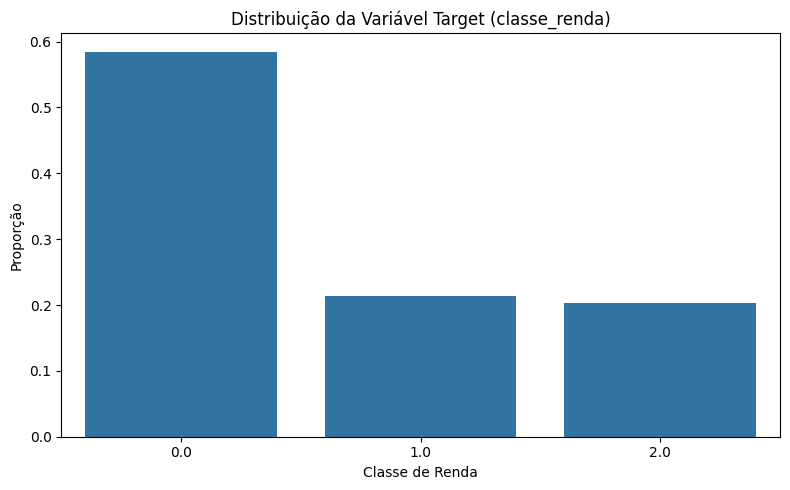

In [16]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# ESTIMAÇÃO PADRÃO

from matplotlib.pylab import f
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Logistic': LogisticRegression(max_iter=2000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)
}

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_scaled, y_train, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Logistic
Scores de validação cruzada: [0.76044298 0.75731865 0.75310881 0.75965026 0.76055699]
Acurácia média: 0.7582155383034133
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85     11275
         1.0       0.61      0.33      0.43      4120
         2.0       0.72      0.74      0.73      3906

    accuracy                           0.76     19301
   macro avg       0.71      0.66      0.67     19301
weighted avg       0.74      0.76      0.74     19301

Acurácia: 0.756955598155536
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.72553591 0.72163212 0.71968912 0.72247409 0.72040155]
Acurácia média: 0.7219465604156621
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83     11275
         1.0       0.49      0.30      0.37      4120
         2.0       0.74      0

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Separando dados em folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando os modelos
models = {
    'Logistic': LogisticRegression(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(silent=True)  # CatBoost tem manejo próprio para desbalanceamento
}

# Aplicar SMOTE para sobreamostragem da classe minoritária
smote = SMOTE(random_state=42)

# Avaliando e treinando cada modelo
for model_name, model in models.items():
    print(f"Avaliando modelo: {model_name}")
    
    # Normalizando os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma dados de treinamento
    X_test_scaled = scaler.transform(X_test)  # Aplica a transformação nos dados de teste
    
    # Aplicar SMOTE nos dados de treinamento
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)
    
    # Avaliando o modelo com validação cruzada
    scores = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='accuracy')
    print("Scores de validação cruzada:", scores)
    print("Acurácia média:", scores.mean())
    
    # Treinando o modelo e fazendo previsões
    model.fit(X_resampled, y_resampled)  # Treinando o modelo com os dados reamostrados
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Avaliar o modelo
    print("Relatório de classificação:")
    print(classification_report(y_test, y_pred))
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("-" * 50)  # Separador entre os modelos


Avaliando modelo: Logistic
Scores de validação cruzada: [0.72027791 0.72201486 0.72271703 0.72378876 0.71912189]
Acurácia média: 0.7215840875264149
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     11275
         1.0       0.51      0.54      0.52      4120
         2.0       0.67      0.79      0.72      3906

    accuracy                           0.74     19301
   macro avg       0.68      0.71      0.69     19301
weighted avg       0.75      0.74      0.75     19301

Acurácia: 0.7417232267758147
--------------------------------------------------
Avaliando modelo: KNN
Scores de validação cruzada: [0.80712517 0.80838168 0.81004472 0.80956429 0.80807894]
Acurácia média: 0.808638959894612
Relatório de classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76     11275
         1.0       0.38      0.51      0.44      4120
         2.0       0.63      0

In [19]:
# ANALISANDO A IMPORTÂNCIA DAS VARIÁVEIS

# Inicializando um dicionário para armazenar as importâncias das variáveis
feature_importances = {}

# Avaliando e treinando cada modelo
for model_name, model in models.items():    
       # Armazenando a importância das características, se disponível
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importances[model_name] = pd.Series(importances, index=X_train.columns)
    elif hasattr(model, 'coef_'):  # Para modelos como Logistic Regression
        importances = np.abs(model.coef_[0])  # Pegando o primeiro conjunto de coeficientes
        feature_importances[model_name] = pd.Series(importances, index=X_train.columns)

    print("-" * 50)

# Criar um DataFrame para armazenar as 10 melhores variáveis de cada modelo
top_features_df = pd.DataFrame()

for model_name, importances in feature_importances.items():
    top_features = importances.nlargest(90)  # Pegando as 10 melhores variáveis
    top_features_df[model_name] = top_features

# visualizando
top_features_df.head()


--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------


,Logistic,Decision Tree,Random Forest,XGBoost,CatBoost
pct_empregado_com_carteira,1.000439,0.058466,0.043406,0.069275,6.787945
pct_deficientes,0.588074,0.052736,0.038343,0.039261,4.310636
pct_idosos,0.532634,0.194319,0.066557,0.177948,6.084761
pct_1_infancia,0.462269,0.005539,0.030717,0.016650,1.772597
pct_militar_servidor,0.412234,0.010752,0.005679,0.030186,1.112139
rf_idade,0.392524,0.048161,0.081615,0.009656,6.287487
pct_crianca_adolescente,0.358028,0.005277,0.023378,0.005721,0.968518
rf_trab_principal,0.297439,0.012813,0.023257,0.019055,1.925622
uf_ibge_29,0.293656,0.003592,0.004650,0.004612,0.264946
qtd_comodos_domic_fam,0.287360,0.032361,0.036191,0.019047,10.219947


In [25]:
top_features_df.columns

Index(['Logistic', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost'], dtype='object')

In [29]:
# criar um dicionário para armazenar os 10 maiores valores de cada modelo

# Obter os índices dos 10 maiores valores do 'XGBoost'
#top_10_indices = top_features_df['XGBoost'].nlargest(10).index.tolist()


# Criar um dicionário para armazenar os índices
top_indices = {}

# Iterar sobre as colunas do DataFrame
for column in top_features_df.columns:
    top_indices[column] = top_features_df[column].nlargest(10).index.tolist()

# Criar um novo DataFrame com os índices
top_indices_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in top_indices.items()]))

top_indices_df


,Logistic,Decision Tree,Random Forest,XGBoost,CatBoost
0,pct_empregado_com_carteira,pct_idosos,rf_idade,pct_idosos,qtde_pessoas
1,pct_deficientes,qtde_pessoas,qtde_pessoas,pct_empregado_com_carteira,qtd_comodos_domic_fam
2,pct_idosos,pct_empregado_com_carteira,pct_idosos,qtde_pessoas,pct_empregado_com_carteira
3,pct_1_infancia,pct_deficientes,pct_adulto,cod_material_piso_fam_5.0,rf_idade
4,pct_militar_servidor,dias_atualizacao,dias_cadastramento,pct_deficientes,pct_idosos
5,rf_idade,dias_cadastramento,dias_atualizacao,pct_adulto,rf_concluiu_curso
6,pct_crianca_adolescente,rf_idade,ideb_2017_municipio,rf_concluiu_curso,rf_curso_frequentou
7,rf_trab_principal,pct_trabalho_12meses_adulto,pct_empregado_com_carteira,pct_militar_servidor,pct_deficientes
8,uf_ibge_29,ideb_2017_municipio,pct_deficientes,rf_trabalhou_semana,pct_trabalho_12meses_adulto
9,qtd_comodos_domic_fam,pct_adulto,qtd_comodos_domic_fam,pct_trab_rural_temporario,rf_cor_raca


In [30]:
# criar um dicionário para armazenar os valores acima da mediana

# Criar um dicionário para armazenar os índices
top_indices = {}

# Iterar sobre as colunas do DataFrame
for column in top_features_df.columns:
    median_value = top_features_df[column].median()  # Calcular a mediana
    indices_above_median = top_features_df[top_features_df[column] > median_value].index.tolist()  # Filtrar índices
    top_indices[column] = indices_above_median

# Criar um novo DataFrame com os índices
top_indices_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in top_indices.items()]))

top_indices_df


,Logistic,Decision Tree,Random Forest,XGBoost,CatBoost
0,pct_empregado_com_carteira,pct_empregado_com_carteira,pct_empregado_com_carteira,pct_empregado_com_carteira,pct_empregado_com_carteira
1,pct_deficientes,pct_deficientes,pct_deficientes,pct_deficientes,pct_deficientes
2,pct_idosos,pct_idosos,pct_idosos,pct_idosos,pct_idosos
3,pct_1_infancia,pct_1_infancia,pct_1_infancia,pct_1_infancia,pct_1_infancia
4,pct_militar_servidor,pct_militar_servidor,pct_militar_servidor,pct_militar_servidor,pct_militar_servidor
5,rf_idade,rf_idade,rf_idade,rf_idade,rf_idade
6,pct_crianca_adolescente,pct_crianca_adolescente,pct_crianca_adolescente,pct_crianca_adolescente,pct_crianca_adolescente
7,rf_trab_principal,rf_trab_principal,rf_trab_principal,rf_trab_principal,rf_trab_principal
8,uf_ibge_29,uf_ibge_29,uf_ibge_29,qtd_comodos_domic_fam,uf_ibge_29
9,qtd_comodos_domic_fam,qtd_comodos_domic_fam,qtd_comodos_domic_fam,qtde_pessoas,qtd_comodos_domic_fam


In [23]:
# Salvando base
#top_features_df.to_csv('resultados/top_features_df.csv', index=False)

                Previsões
               A     B     C
          -------------------
      A |  TP_A  FP_B  FP_C
Real  B |  FN_A  TP_B  FP_C
      C |  FN_A  FN_B  TP_C


In [ ]:
df['classe_renda'].value_counts()

In [34]:
#Aquele usando o recall que conversamos ontem ficou assim:
from sklearn.metrics import recall_score
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.utils import class_weight

# Definir hiperparâmetros para a busca bayesiana
param_grid_bayes = {
    'xgb__eta': [0.01, 0.015, 0.025, 0.05, 0.1],
    'xgb__gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'xgb__max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
    'xgb__min_child_weight': [1, 3, 5, 7],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__lambda': [0.01, 0.1, 1.0],
    'xgb__alpha': [0, 0.1, 0.5, 1.0]
}

# Definir scale_pos_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

# Criar pipeline com RobustScaler e XGBoost Classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  
    ('xgb', XGBClassifier(
        random_state=1,
        eval_metric='logloss',  
        sample_weight=classes_weights 
    ))
])

# Realizar a busca bayesiana com validação cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# Usar recall como métrica de scoring
scorer = make_scorer(recall_score)

bayes_search_xgb = BayesSearchCV(
    pipeline_xgb,
    search_spaces=param_grid_bayes,
    n_iter=30,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    random_state=1
)

# Ajustar o modelo ao conjunto de treino balanceado por pesos scale_pos_weight
bayes_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb_model = bayes_search_xgb.best_estimator_

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros com scale_pos_weight: {bayes_search_xgb.best_params_}")

# Fazer previsões com o conjunto de teste original
y_pred_xgb_smote = best_xgb_model.predict(X_test)

# Relatório de classificação
classification_report_xgb = metrics.classification_report(
    y_test, y_pred_xgb_smote, digits=6
)

print('Classification report para XGBoost com scale_pos_weight: \n')
print(classification_report_xgb)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [35]:
from sklearn.metrics import recall_score, classification_report
from skopt import BayesSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.utils import class_weight
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

# Definir hiperparâmetros para a busca bayesiana
param_grid_bayes = {
    'xgb__eta': [0.01, 0.015, 0.025, 0.05, 0.1],
    'xgb__gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'xgb__max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
    'xgb__min_child_weight': [1, 3, 5, 7],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__lambda': [0.01, 0.1, 1.0],
    'xgb__alpha': [0, 0.1, 0.5, 1.0]
}

# Definir scale_pos_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)

# Criar pipeline com StandardScaler e XGBoost Classifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  
    ('xgb', XGBClassifier(
        random_state=1,
        eval_metric='logloss',  
        sample_weight=classes_weights 
    ))
])

# Realizar a busca bayesiana com validação cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# Usar recall como métrica de scoring (com média adequada para multiclasses)
scorer = make_scorer(recall_score, average='macro')  # ou 'micro', 'weighted'

bayes_search_xgb = BayesSearchCV(
    pipeline_xgb,
    search_spaces=param_grid_bayes,
    n_iter=30,
    cv=cv,
    scoring=scorer,
    n_jobs=-1,
    random_state=1
)

# Ajustar o modelo ao conjunto de treino
bayes_search_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb_model = bayes_search_xgb.best_estimator_

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {bayes_search_xgb.best_params_}")

# Fazer previsões com o conjunto de teste
y_pred_xgb_smote = best_xgb_model.predict(X_test)

# Relatório de classificação
classification_report_xgb = classification_report(y_test, y_pred_xgb_smote, digits=6)

print('Classification report para XGBoost: \n')
print(classification_report_xgb)


c:\Users\miche\Desktop\Boootcamp_Machine_Learning\Projeto_Final\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:05:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sample_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores hiperparâmetros: OrderedDict([('xgb__alpha', 0.1), ('xgb__colsample_bytree', 0.7), ('xgb__eta', 0.1), ('xgb__gamma', 1.0), ('xgb__lambda', 1.0), ('xgb__max_depth', 9), ('xgb__min_child_weight', 3), ('xgb__subsample', 0.6)])
Classification report para XGBoost: 

              precision    recall  f1-score   support

         0.0   0.840366  0.913259  0.875298     11275
         1.0   0.654302  0.522330  0.580915      4120
         2.0   0.776270  0.747056  0.761383      3906

    accuracy                       0.796176     19301
   macro avg   0.756979  0.727548  0.739199     19301
weighted avg   0.787677  0.796176  0.789405     19301

